# Import Liberary

In [1]:
import urllib
from bs4 import BeautifulSoup as bs
from time import sleep
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,wordnet
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
url_list=['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']    

### Data Scraping

In [3]:
artiest=[]
trans_list=[]
for i in url_list:
    webpage=urllib.request.urlopen(i)
    soup=bs(webpage,"html.parser")
    artiest.append([i.text[:i.text.find(":")].lower() for i in soup.select("h1.elementor-heading-title")])
    trans_list.append([i.text.lower() for i in soup.select("div.elementor-element:nth-child(6) > div:nth-child(1)")])

In [4]:
len(trans_list)

10

In [5]:
trans_list=[" ".join(i)for i in trans_list]

In [6]:
[len(i)for i in trans_list]

[39147, 4, 4, 47, 58687, 4, 38978, 34522, 4, 4]

In [7]:
trans_list[0][:100]

'\nintro\nfade the music out. let’s roll. hold there. lights. do the lights. thank you. thank you very '

In [8]:
artiest= [" ".join(i)for i in artiest]

In [9]:
# Artists Names
artiest

['louis c.k.',
 'dave chappelle',
 'ricky gervais',
 'bill burr',
 'jim jefferies',
 'john mulaney',
 'ali wong',
 'anthony jeselnik',
 'mike birbiglia',
 'joe rogan']

In [10]:
import string

In [11]:
# Cleaning Up the Data
def clean_data(text):
    return [[WordNetLemmatizer().lemmatize(i) for i in word_tokenize(a) if len(i)>2 if i!="\n" if i!='"'if i not in string.punctuation if i not in stopwords.words("english")]for a in text ]

In [12]:
clean_text=clean_data(trans_list)

In [13]:
clean_text=[" ".join(i)for i in clean_text]

In [14]:
clean_text[0][:100]

'intro fade music let roll hold light light thank thank much appreciate necessarily agree appreciate '

In [15]:
df=pd.DataFrame(clean_text,index=artiest)

In [16]:
df.head()

,0
louis c.k.,intro fade music let roll hold light light tha...
dave chappelle,
ricky gervais,
bill burr,bill burr stand-up transcript
jim jefferies,car horn honk audience cheering announcer lady...


In [17]:
# dropping the empty rows
df.drop(df.loc[df[0]==''].index,inplace=True)

In [18]:
df

,0
louis c.k.,intro fade music let roll hold light light tha...
bill burr,bill burr stand-up transcript
jim jefferies,car horn honk audience cheering announcer lady...
ali wong,lady gentleman please welcome stage ali wong h...
anthony jeselnik,thank thank thank san francisco thank much goo...


# Phrase Modulation
## Bigrams

In [19]:
import gensim
from nltk.probability import FreqDist

In [20]:
phrase_model_train=gensim.models.phrases.Phrases(sentences=[a.split() for a in df[0]],threshold=2,min_count=1)

In [21]:
bi=phrase_model_train[[a.split() for a in df[0]]]
[i for i in bi][0][:50]

['intro',
 'fade',
 'music',
 'let',
 'roll',
 'hold',
 'light',
 'light',
 'thank_thank',
 'much',
 'appreciate',
 'necessarily',
 'agree',
 'appreciate',
 'much',
 'well',
 'nice_place',
 'easily',
 'nicest',
 'place',
 'many',
 'mile_every',
 'direction',
 'compliment',
 'building',
 'shit',
 'town',
 'one',
 'sentence',
 'odd',
 'around',
 'driving',
 'seem',
 'difference',
 'sidewalk',
 'street',
 'pedestrian',
 'people_kind',
 'walk',
 'middle',
 'road',
 'love',
 'traveling',
 'seeing',
 'different',
 'part',
 'country',
 'live_new',
 'york',
 'live']

In [22]:
len(phrase_model_train.vocab.keys())

16225

# Word Embeddings
## Count Vectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
count_model=CountVectorizer(lowercase=False,ngram_range=(1,2),stop_words="english")

In [25]:
# Document Term Matrix
matrix=count_model.fit_transform([i for i in df[0]])

In [26]:
count_model.get_feature_names_out(),len(count_model.get_feature_names_out())

(array(['00', '00 monday', '00 usually', ..., 'zero value', 'zombie',
        'zombie just'], dtype=object),
 13677)

In [27]:
# Document Term Matrix

pd.DataFrame(matrix.toarray(),columns=count_model.get_feature_names_out(),index=df.index)

,00,00 monday,00 usually,000,000 34,000 american,000 buck,000 debt,000 great,000 hot,...,zealand rise,zealand seen,zealand shark,zealand tracked,zealand want,zero,zero people,zero value,zombie,zombie just
louis c.k.,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,1,0,0
bill burr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jim jefferies,1,1,0,7,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
ali wong,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
anthony jeselnik,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0


# Topic Modelling
## Latent Derichlet Allocation

In [28]:
lda=gensim.models.ldamodel.LdaModel

In [29]:
# preparing Dictionary
dic=gensim.corpora.Dictionary(i.split() for i in df[0])

In [30]:
# preparing bag of words
corpus=[dic.doc2bow(i.split())for i in df[0]]

In [31]:
# innitializing Model
lda_model_train=lda(corpus,num_topics=5,id2word=dic)

In [32]:
lda_model_train.show_topics()

[(0,
  '0.018*"know" + 0.018*"like" + 0.008*"thing" + 0.008*"right" + 0.008*"people" + 0.007*"get" + 0.006*"one" + 0.006*"guy" + 0.006*"fuck" + 0.005*"see"'),
 (1,
  '0.023*"like" + 0.012*"know" + 0.010*"get" + 0.009*"got" + 0.009*"right" + 0.008*"one" + 0.006*"thing" + 0.006*"woman" + 0.005*"people" + 0.005*"day"'),
 (2,
  '0.018*"like" + 0.012*"get" + 0.010*"know" + 0.009*"right" + 0.009*"one" + 0.009*"got" + 0.008*"thing" + 0.007*"people" + 0.007*"day" + 0.006*"fucking"'),
 (3,
  '0.025*"like" + 0.012*"know" + 0.010*"get" + 0.007*"right" + 0.007*"got" + 0.006*"people" + 0.006*"think" + 0.006*"shit" + 0.006*"one" + 0.005*"guy"'),
 (4,
  '0.022*"like" + 0.015*"know" + 0.012*"get" + 0.008*"people" + 0.007*"woman" + 0.006*"got" + 0.006*"fucking" + 0.006*"right" + 0.006*"thing" + 0.006*"gon"')]

In [33]:
df[0]=df[0].apply(lambda x:x.split())

In [34]:
# extracting top 20 common words for every comedian
common_tokens=[[i[0] for i in FreqDist(df[0][z]).most_common(20)] for z in range(len(df[0]))]

In [35]:
pd.DataFrame(common_tokens)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,like,know,get,life,people,thing,tit,one,gon,cause,every,kid,guy,time,would,think,shit,good,woman,right
1,bill,burr,stand-up,transcript,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,like,right,fucking,know,went,get,thing,one,people,fuck,gun,think,day,woman,going,come,go,got,said,guy
3,like,know,get,got,shit,gon,woman,lot,see,wan,husband,would,day,right,time,cause,people,need,pregnant,tell
4,like,joke,got,one,get,know,said,thing,say,guy,anthony,day,people,would,see,ever,tell,time,grandma,think


In [36]:
token_list=[i for i in df[0]]

In [37]:
# original Tokens
len(token_list[0]),token_list[0][:50]

(3363,
 ['intro',
  'fade',
  'music',
  'let',
  'roll',
  'hold',
  'light',
  'light',
  'thank',
  'thank',
  'much',
  'appreciate',
  'necessarily',
  'agree',
  'appreciate',
  'much',
  'well',
  'nice',
  'place',
  'easily',
  'nicest',
  'place',
  'many',
  'mile',
  'every',
  'direction',
  'compliment',
  'building',
  'shit',
  'town',
  'one',
  'sentence',
  'odd',
  'around',
  'driving',
  'seem',
  'difference',
  'sidewalk',
  'street',
  'pedestrian',
  'people',
  'kind',
  'walk',
  'middle',
  'road',
  'love',
  'traveling',
  'seeing',
  'different',
  'part'])

In [38]:
# removing common words
df[0]=[[x for x in token_list[i]if x not in common_tokens[i]]for i in range(len(common_tokens))]

In [39]:
# originally 3363 tokens
len(df[0][0])

2650

In [40]:
# now again Topic Modelling

# new dictionay
new_dic=gensim.corpora.Dictionary([i for i in df[0]])

In [41]:
df[0]

louis c.k.          [intro, fade, music, let, roll, hold, light, l...
bill burr                                                          []
jim jefferies       [car, horn, honk, audience, cheering, announce...
ali wong            [lady, gentleman, please, welcome, stage, ali,...
anthony jeselnik    [thank, thank, thank, san, francisco, thank, m...
Name: 0, dtype: object

In [42]:
# New bag of words
new_corpus=[new_dic.doc2bow(i)for i in df[0]]

In [43]:
lda_model_train_2=lda(new_corpus,num_topics=5,id2word=new_dic)

In [44]:
# 10 topics from every transcript

lda_model_train_2.show_topics()

[(0,
  '0.004*"see" + 0.004*"want" + 0.004*"love" + 0.004*"say" + 0.004*"really" + 0.004*"little" + 0.003*"come" + 0.003*"good" + 0.003*"even" + 0.003*"baby"'),
 (1,
  '0.004*"never" + 0.004*"yeah" + 0.004*"good" + 0.004*"say" + 0.003*"want" + 0.003*"really" + 0.003*"man" + 0.003*"could" + 0.003*"always" + 0.003*"see"'),
 (2,
  '0.005*"really" + 0.004*"first" + 0.004*"never" + 0.004*"say" + 0.004*"yeah" + 0.003*"want" + 0.003*"even" + 0.003*"little" + 0.003*"see" + 0.003*"way"'),
 (3,
  '0.004*"really" + 0.003*"never" + 0.003*"come" + 0.003*"want" + 0.003*"baby" + 0.003*"say" + 0.003*"back" + 0.003*"year" + 0.003*"first" + 0.003*"take"'),
 (4,
  '0.005*"really" + 0.004*"say" + 0.004*"could" + 0.004*"yeah" + 0.004*"little" + 0.003*"want" + 0.003*"man" + 0.003*"first" + 0.003*"baby" + 0.003*"kid"')]


# Exploratory Data Analyses

## 1. Total number of Words spoken
## 2. Total number of Unique Words spoken
## 3. Common words by every Comedian
## 4. Simmilar common words
## 5. Profanity Used

In [45]:
df.drop(index='bill burr',inplace=True)

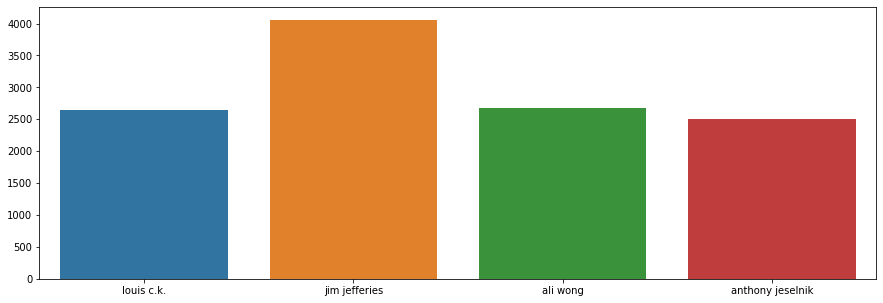

In [46]:
# Total Number Of Words per Comedian
total_count=[]
for i in df[0].values:
    count=0
    for j in i:
        count+=1
    total_count.append(count)

plt.figure(figsize=(15,5))
sns.barplot(x=df.index,y=total_count)
plt.savefig("TOT_words")

### As per the graph " Jim Jefferies" speak really fast with whooping 4000 words in a single standup night

In [47]:
# Total number of Unique Words by every Comedian

unique_words_count=[len(pd.DataFrame(df[0][i])[0].unique()) for i in range(len(df[0].values))]

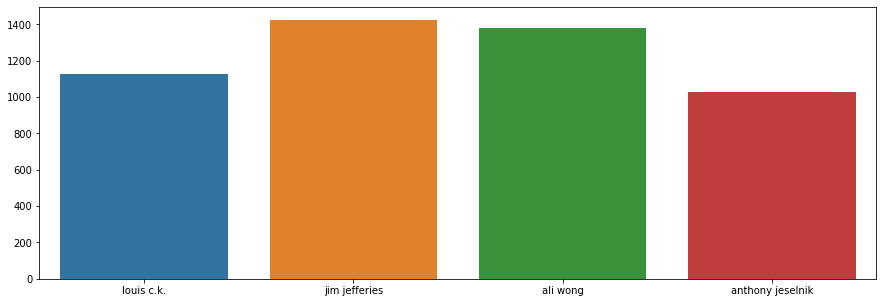

In [48]:
plt.figure(figsize=(15,5))

sns.barplot(x=df.index,y=unique_words_count)
plt.savefig("Uniqe_words")

## As the unique word count of " Jim Jefferies" is more than any one else but interestign find is that " Ali Wong " uses more unique words prior to her total words.

## Then that means Ali Wong will make use of distinguised words more than any one else if word count of every comedian was equal.

In [49]:
# Lets see the profanity used by Comedians

# lets take the most number of words spoken i.e Jim Jefferies and collect the words starts with "f" or "s"

swear_words=list(set([ i for i in df.iloc[1][0] if i.startswith(("fuck","shit"))]))

In [50]:
swear_words.extend(["fuck","shit"])

In [51]:
swear_count=[]
for i in df[0].values:
    count=0
    for j in i:
        if j in swear_words:
           count+=1
    swear_count.append(count)

swear_count

[19, 33, 16, 22]

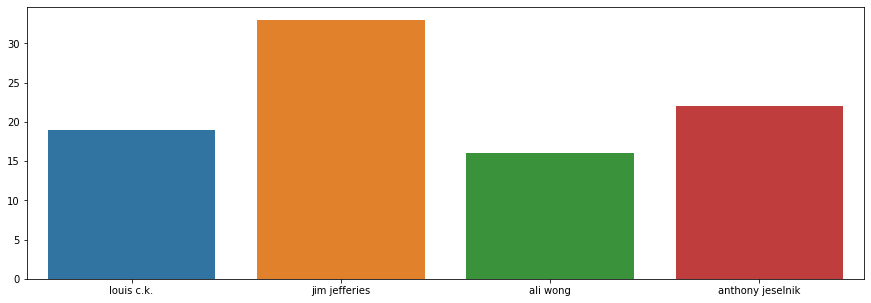

In [52]:
plt.figure(figsize=(15,5))

sns.barplot(x=df.index,y=swear_count)
plt.savefig("Swear_count")

### Lowest profanity " Ali Wong "
### Highest profanity " Jim Jefferies "

# Lets see the common words spoken by every comedian

In [53]:
unique_words=[pd.DataFrame(df[0][i])[0].unique().tolist() for i in range(len(df[0].values))]

In [61]:
unique_words[0][:50]

['thank',
 'san',
 'francisco',
 'much',
 'good',
 'surprised',
 'told',
 'gon',
 'tape',
 'special',
 'politically',
 'correct',
 'city',
 'world.',
 'stage',
 'love',
 'place',
 'favorite',
 'perform',
 'hang',
 'walk',
 'around',
 'little',
 'bit',
 'today',
 'saw',
 'baby',
 'locked',
 'inside',
 'back',
 'hot',
 'car',
 'great',
 'wrong',
 'monster',
 'tried',
 'help',
 'throw',
 'rock',
 'window',
 'ruined',
 'whole',
 'weekend',
 'worth',
 'beautiful',
 'woman',
 'yeah',
 'gorgeous',
 'despite',
 'going']

In [55]:
# look for largest list
[len(i)for i in unique_words]

[1126, 1425, 1381, 1027]

In [56]:
# sort according to larger list
unique_words.sort(key=lambda x:len(x))
[len(i)for i in unique_words]

[1027, 1126, 1381, 1425]

In [57]:
# Make Largest list a set and intersect with all other lists
common_unique_words=set(unique_words[0])
for word in unique_words[1:]:
    common_unique_words.intersection_update(word)

In [58]:
list(common_unique_words).sort()

In [59]:
word_cloud=WordCloud(stopwords=set(STOPWORDS),width = 1000, height = 500).generate(" ".join(common_unique_words))

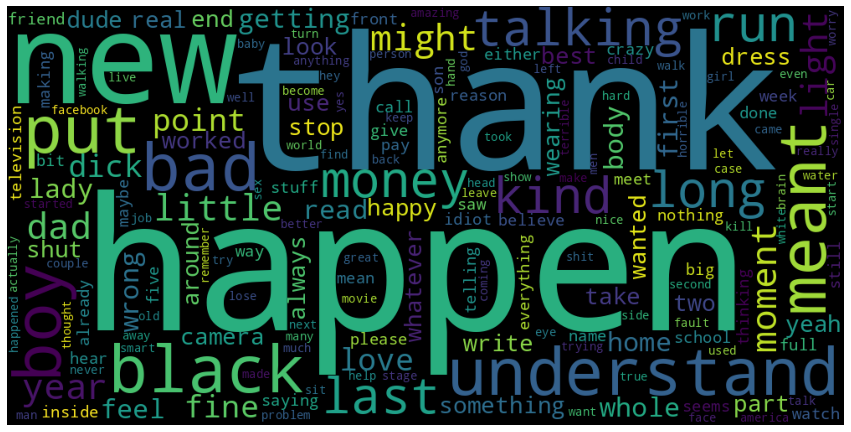

In [60]:
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

### Interesting, No profanity at all